In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib.pyplot import imread

In [3]:
from random import shuffle, random
import cv2
from skimage import exposure

In [4]:
data_dir = 'data/data2'

In [10]:
colnames = ['center_img', 'left_img', 'right_img', 'steering_angle', 'throttle', 'break', 'speed']
driving_log_pd = pd.read_csv('%s/driving_log.csv' % data_dir, sep=',', 
                            names=colnames)
driving_log_pd.loc[:100]

center_img  \
0    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
1    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
2    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
3    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
4    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
5    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
6    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
7    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
8    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
9    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
10   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
11   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
12   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
13   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
14   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
15   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
16   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
17   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
18   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
19   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
20   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
21   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
22   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
23   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
24   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
25   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
26   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
27   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
28   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
29   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
..                                                 ...   
71   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
72   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
73   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
74   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
75   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
76   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
77   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
78   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
79   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
80   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
81   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
82   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
83   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
84   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
85   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
86   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
87   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
88   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
89   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
90   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
91   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
92   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
93   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
94   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
95   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
96   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
97   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
98   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
99   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
100  /Users/phillipcchin/work/CarND-Behavioral-Clon...   

                                              left_img  \
0    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
1    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
2    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
3    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
4    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
5    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
6    /Users/phillipcchin/work/CarND-Behav

In [11]:
def parse_file_name(full_path):
    if '/' in full_path:
        return full_path.split('/')[-1]
    else:
        return full_path

In [12]:
for colname in ['center_img', 'left_img', 'right_img']:
    driving_log_pd[colname] = [parse_file_name(x) for x in driving_log_pd[colname].tolist()]

driving_log_pd.head()

center_img                          left_img  \
0  center_2018_01_22_19_22_53_312.jpg  left_2018_01_22_19_22_53_312.jpg   
1  center_2018_01_22_19_22_53_419.jpg  left_2018_01_22_19_22_53_419.jpg   
2  center_2018_01_22_19_22_53_517.jpg  left_2018_01_22_19_22_53_517.jpg   
3  center_2018_01_22_19_22_53_589.jpg  left_2018_01_22_19_22_53_589.jpg   
4  center_2018_01_22_19_22_53_690.jpg  left_2018_01_22_19_22_53_690.jpg   

                           right_img  steering_angle  throttle  break  \
0  right_2018_01_22_19_22_53_312.jpg             0.0       0.0    0.0   
1  right_2018_01_22_19_22_53_419.jpg             0.0       0.0    0.0   
2  right_2018_01_22_19_22_53_517.jpg             0.0       0.0    0.0   
3  right_2018_01_22_19_22_53_589.jpg             0.0       0.0    0.0   
4  right_2018_01_22_19_22_53_690.jpg             0.0       0.0    0.0   

      speed  
0  5.544637  
1  5.489003  
2  5.433926  
3  5.390263  
4  5.336177

In [13]:
def display_images(X, start_idx=0, end_idx=None, 
                       columns = 5, use_gray=False, apply_fnc=None):
    if end_idx is None:
        end_idx = X.shape[0]
        
    if apply_fnc is None:
        apply_fnc = lambda image: image
        
    plt.figure(figsize=(32,18))

    num_of_images = end_idx - start_idx
    rows = num_of_images / columns + 1
    
    for i in range(start_idx, end_idx):
        image = X[i]
        
        _i = i % num_of_images
        plt.subplot(rows, columns, _i + 1)
        
        if use_gray:
            plt.imshow(apply_fnc(image), cmap="gray")
        else:
            plt.imshow(apply_fnc(image)) 
            
    plt.tight_layout()
            
    plt.show()

In [14]:
img_dir = '%s/IMG' % data_dir

In [15]:
def read_imgs(img_dir, file_names):
    img_arr = []
    
    for file_name in file_names:
        img = imread('%s/%s' % (img_dir, file_name))
        img_arr.append(img)
        
    return np.stack(img_arr)

In [16]:
sample_imgs = read_imgs(img_dir, driving_log_pd['center_img'].tolist()[:10])
sample_imgs.shape

(10, 160, 320, 3)

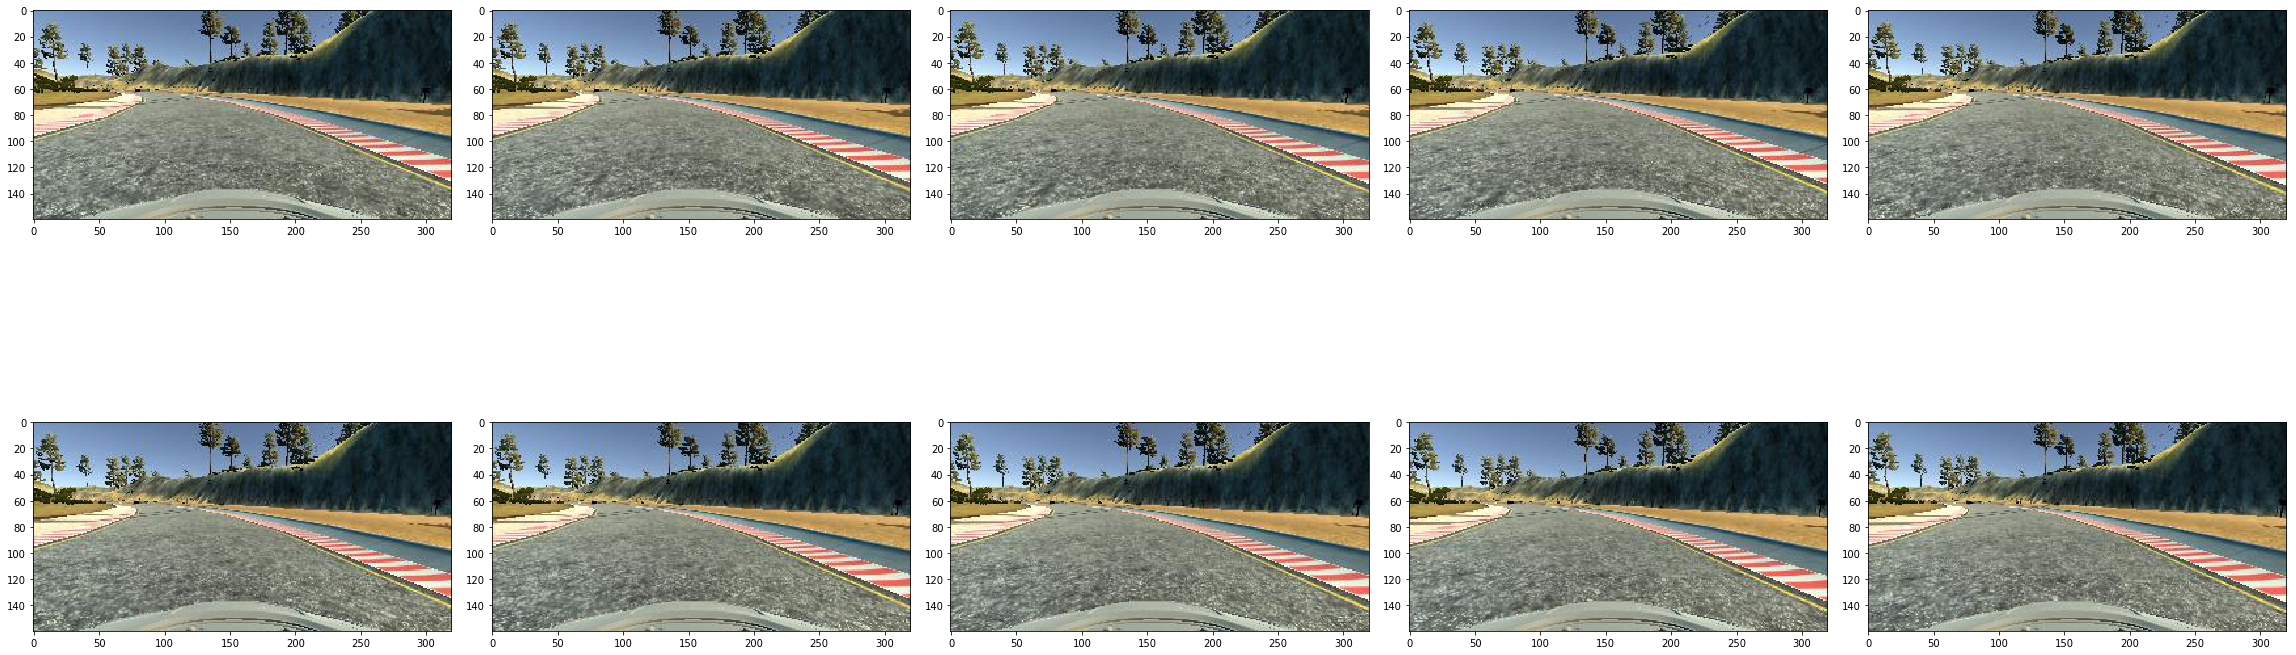

In [17]:
display_images(sample_imgs, columns=5)

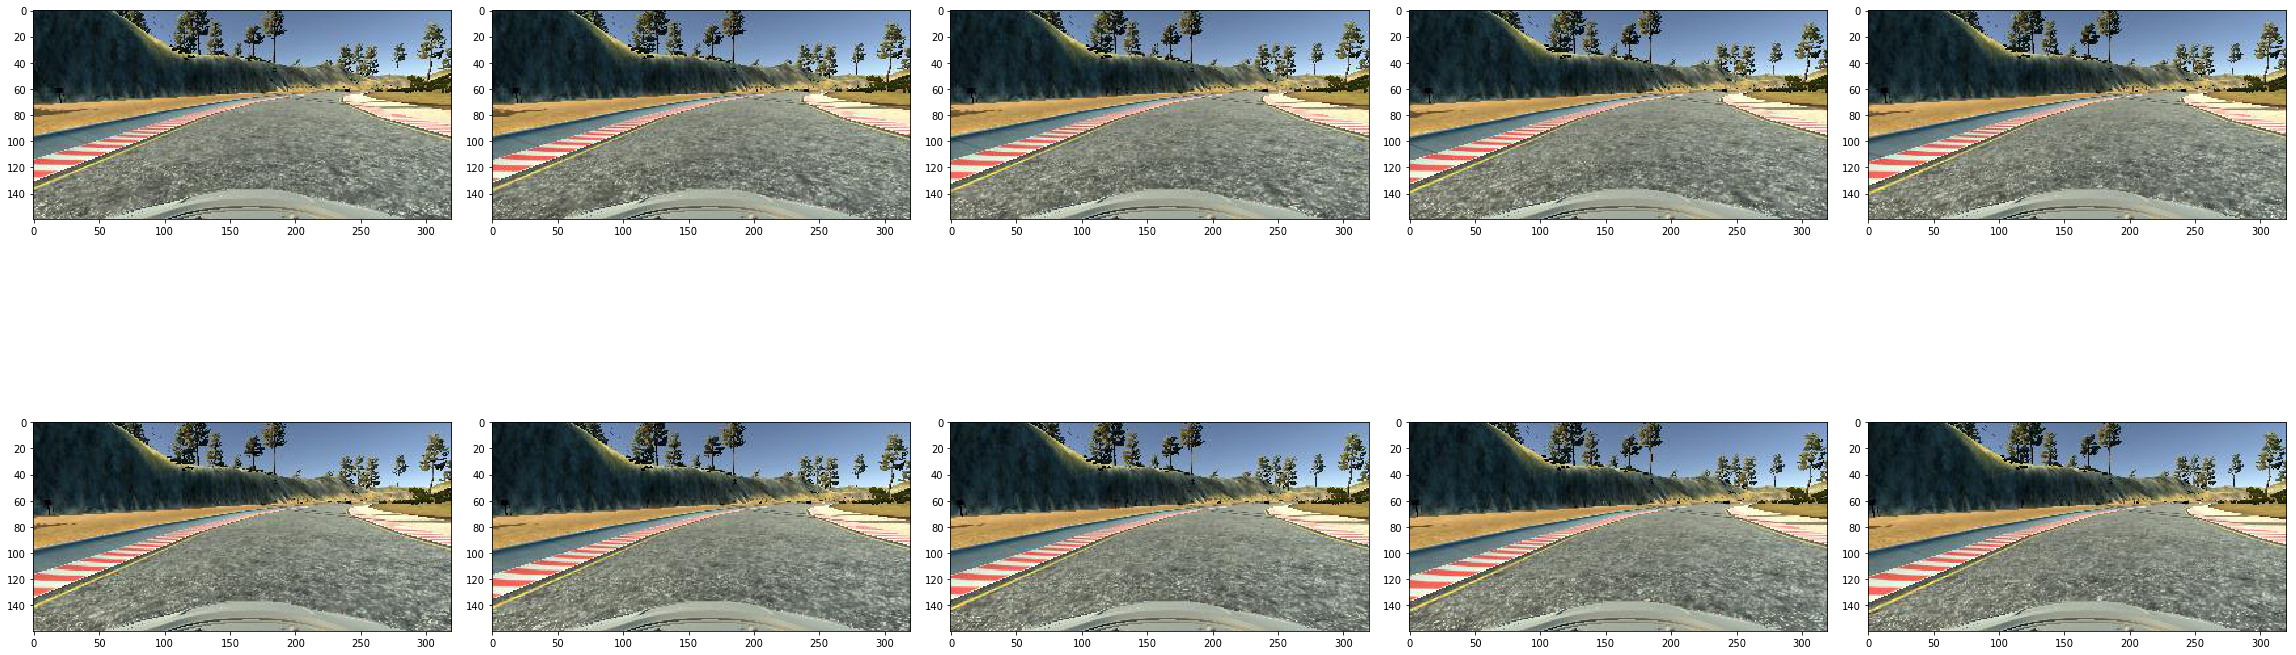

In [18]:
display_images(sample_imgs, columns=5, apply_fnc=np.fliplr)

In [19]:
def apply_histogram_equalization(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    equalized_image = exposure.equalize_adapthist(gray_image)
    
    return (255.0*equalized_image).astype(np.uint8)

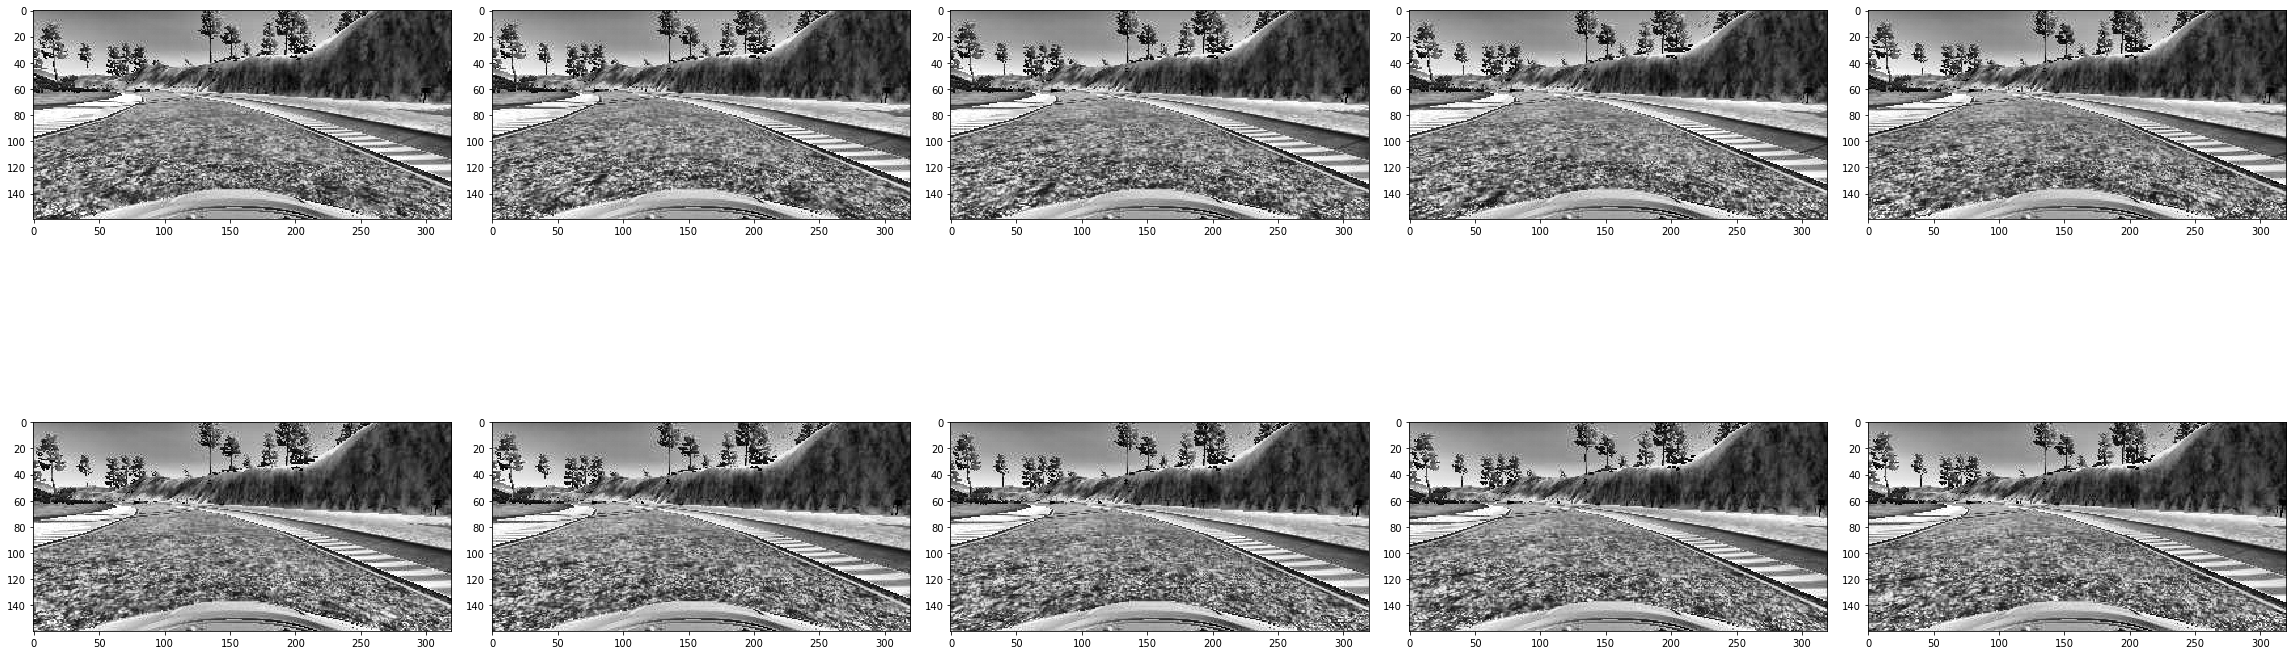

In [20]:
display_images(sample_imgs, columns=5, use_gray=True,
               apply_fnc=apply_histogram_equalization)

## Steering Angles

In [21]:
steering_angles = driving_log_pd['steering_angle'].tolist()

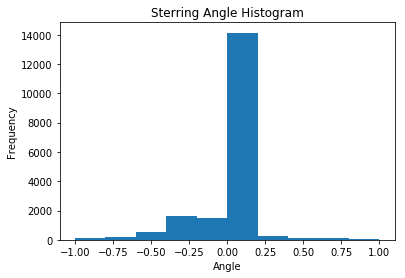

# of bins: 11


In [22]:
n, bins, patches = plt.hist(steering_angles)
plt.title("Sterring Angle Histogram")
plt.xlabel("Angle")
plt.ylabel("Frequency")
plt.show()

print("# of bins: %d" % len(bins))

In [23]:
min(steering_angles), max(steering_angles)

(-1.0, 1.0)

In [24]:
print('minimum frequency: %d' % np.histogram(steering_angles, bins)[0].min())

minimum frequency: 61


## Data

In [25]:
img_steering_pd = driving_log_pd[['center_img', 'steering_angle']]

In [26]:
img_steering_pd['steering_angle'].min(), img_steering_pd['steering_angle'].max()

(-1.0, 1.0)

In [28]:
def smooth_steering_angle(img_steering_pd):
    steering_angles = img_steering_pd['steering_angle'].tolist()
    prior_steering_angles = steering_angles + [0.0, 0.0]
    curr_steering_angles = [0.0] + steering_angles + [0.0]
    next_steering_angles = [0.0, 0.0] + steering_angles

    steering_angles_pd = pd.DataFrame(data={'prior': prior_steering_angles, 
                                           'curr': curr_steering_angles,
                                           'next': next_steering_angles})

    steering_angles_pd['mean_steering_angle'] = steering_angles_pd.mean(numeric_only=True, axis=1)
    steering_angles_pd = steering_angles_pd.iloc[1:-1]
    steering_angles_pd.index = list(range(len(steering_angles_pd.index)))

    _img_steering_pd = pd.concat([img_steering_pd, steering_angles_pd], axis=1)
    _img_steering_pd.head()
    
    _img_steering_pd = _img_steering_pd[['center_img', 'mean_steering_angle']]
    _img_steering_pd.rename(mapper={'mean_steering_angle': 'steering_angle'},
                                    axis='columns', inplace=True)
    
    
    return _img_steering_pd

In [29]:
_img_steering_pd = smooth_steering_angle(img_steering_pd)
_img_steering_pd.head()

center_img  steering_angle
0  center_2018_01_22_19_22_53_312.jpg             0.0
1  center_2018_01_22_19_22_53_419.jpg             0.0
2  center_2018_01_22_19_22_53_517.jpg             0.0
3  center_2018_01_22_19_22_53_589.jpg             0.0
4  center_2018_01_22_19_22_53_690.jpg             0.0

In [30]:
def split_train_test(img_steering_pd, train_perc=0.7, val_perc=0.2):
    idx_len = len(img_steering_pd.index)
    idxs = list(range(idx_len))
    shuffle(idxs)
    
    idx1 = int(idx_len*train_perc)
    idx2 = idx1 + int(idx_len*val_perc)
    
    train_pd = img_steering_pd.loc[idxs[:idx1]]
    val_pd = img_steering_pd.loc[idxs[idx1:idx2]]
    test_pd = img_steering_pd.loc[idxs[idx2:]]
    
    return train_pd, val_pd, test_pd

In [31]:
#train_pd, val_pd, test_pd = split_train_test(img_steering_pd)
train_pd, val_pd, test_pd = split_train_test(_img_steering_pd)
print(len(train_pd.index), len(val_pd.index), len(test_pd.index))

13050 3728 1866


In [32]:
_train_pd = train_pd.iloc[:int(0.1*len(train_pd.index))]
#_train_pd = train_pd
_val_pd = val_pd.iloc[:int(0.1*len(val_pd.index))]
#_val_pd = val_pd
_test_pd = test_pd.iloc[:int(0.1*len(test_pd.index))]
#_test_pd = test_pd

In [33]:
X_train = read_imgs(img_dir, _train_pd['center_img'].tolist())
y_train = np.array(_train_pd['steering_angle'])
X_val = read_imgs(img_dir, _val_pd['center_img'].tolist())
y_val = np.array(_val_pd['steering_angle'])
X_test = read_imgs(img_dir, _test_pd['center_img'].tolist())
y_test = np.array(_test_pd['steering_angle'])

In [34]:
X_train.shape

(1305, 160, 320, 3)

## Model

In [35]:
from keras.models import Sequential
from keras.layers import Activation, Flatten, Dense, Lambda, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [36]:
from keras import backend as K

In [37]:
import keras
keras.__version__

'1.2.1'

In [38]:
import tensorflow as tf
tf.__version__

'0.12.1'

In [40]:
batch_size=32
p = 0.5

In [41]:
model = Sequential()
model.add(Lambda(lambda x: K.tf.image.rgb_to_grayscale(x), input_shape=(160,320,3)))
model.add(Lambda(lambda x: x / 255.0 - 0.5))
#model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160,320,3)))

# block 1
model.add(Conv2D(8, nb_row=3, nb_col=3, subsample=(1, 1), border_mode='same', 
                 activation='relu'))
model.add(Conv2D(8, nb_row=3, nb_col=3, subsample=(1, 1), border_mode='same', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), border_mode='same'))
#model.add(Dropout(p))

# block 2
model.add(Conv2D(16, nb_row=3, nb_col=3, subsample=(1, 1), border_mode='same', 
                 activation='relu'))
model.add(Conv2D(16, nb_row=3, nb_col=3, subsample=(1, 1), border_mode='same', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), border_mode='same'))
#model.add(Dropout(p))

# block 3
model.add(Conv2D(32, nb_row=3, nb_col=3, subsample=(1, 1), border_mode='same', 
                 activation='relu'))
model.add(Conv2D(32, nb_row=3, nb_col=3, subsample=(1, 1), border_mode='same', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), border_mode='same'))
#model.add(Dropout(p))
          
model.add(Flatten())          
 
model.add(Dense(128, activation=None))
model.add(Dropout(p))
model.add(Activation('relu'))
model.add(Dense(1))

In [42]:
from sklearn.utils import shuffle as shuffle_X_y

In [ ]:
def image_gen(X, y, batch_size, flip_perc=0.5):
    X_len = X.shape[0]
    
    while True:
        X, y = shuffle_X_y(X, y)
        
        for i in range(0, X_len, batch_size):
            end_idx = min(i+batch_size, X_len)
            
            curr_X = X[i:end_idx].copy()
            curr_y = y[i:end_idx].copy()
            
            """
            for j in range(curr_X.shape[0]):
                if random() > flip_perc:
                    curr_X[j] = np.fliplr(curr_X[j])
                    curr_y[j] = -1.0 * curr_y[j]
            """
                    
            yield curr_X, curr_y

In [ ]:
lr=0.0001
nb_epoch=10

optimizer = Adam(lr=lr)
model.compile(loss='mse', optimizer=optimizer)

train_gen = image_gen(X_train, y_train, batch_size)
model.fit_generator(train_gen, validation_data=(X_val, y_val), 
                    samples_per_epoch=X_train.shape[0],
                    nb_epoch=nb_epoch, nb_worker=1)

Epoch 1/10
1305/1305 [==============================] - 190s - loss: 0.0301 - val_loss: 0.0187

In [ ]:
test_loss = model.evaluate(X_test, y_test)
test_loss

In [ ]:
model.save('%s/model.h5'%data_dir)